## Fundamentals of Data Analysis Tasks
### Hayley Doherty
---

### Task 1: Counts
The aim of this task is to write a python function called counts that takes in a list as input and returns a dictionary of the unique items from the list as keys and the number of times each item appears in the list.


The code for my 'counts' function was adapted from a similar function found on Geeks for Geeks [1]. This original function can only be used to count the frquency of numbers in a list and the result is output in the form of a list. However the task description states the output should be in the form of a dictionary and the input list should contain different forms of data such as strings so I had to alter the code to change these aspects. To do this I removed the second for loop and set the return value to the frequency dictionary. This enabled strings to be enyered as input, as the %d placeholder was removed, and returned a dictionary as specified in the task description.

The function contains a for loop which loops through each item in the list. If the item has been seen by the loop before 1 is added to its frequency and if it has not been encountered before, its frequency is set to 1. The loop ends after it has enountered each item in the inout list and the frequency dictionary which contains the number of times each item appears in the list is output.

In [20]:
import numpy as np
rng = np.random.default_rng()
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
my_list = [1, 2, 1, 3, 1, 2, 'a', 'b', 'a']
# Original code from Geeks for Geeks
def CountFrequency(my_list): 
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    for key, value in freq.items(): 
        print ("% d : % d"%(key, value))
        
CountFrequency(my_list)

In [4]:
def counts(lists): 
  
    # Creating an empty dictionary  
    freq = {} 
    # for loop will iterate through the list
    for item in lists: 
        # if statement to determine if the item has been enountered before, if it has 1 is added to the frequency
        if (item in freq): 
            freq[item] += 1
        # if item has not been encountered in the loop before, the frequency is set to 1
        else: 
            freq[item] = 1
    return freq

In [7]:
mylist = [1, 2, 1, 1, 2, 1, 3, 1, 2, 'a', 'b', 'a']
print(counts(mylist))

{1: 5, 2: 3, 3: 1, 'a': 2, 'b': 1}


The empty 'freq' dictionary

Below I added a list into the input list to see if the function would still work however an error occurred (TypeError: unhashable type: list). This is because lists cannot be used as keys in a dictionary as they can be modified; only immutable data types can be used as keys such as strings and numbers as well as tuples as long as the tuple contains only immutable objects [2].

In [19]:
mylist2 = [1, 1, 2, 'a', 'b', [1, 2, 3], 'a', 'a']
counts(mylist2)

TypeError: unhashable type: 'list'

---
### Task 2: Dicerolls

The aim of this task is to write a function that takes two parameters, *k*, the number of dice to be rolled and *n* the number of times the dice are rolled. The function should return a dictionary with the number of times each possible total value occurred.

From research on the NumPy.random function, performed as part of a project for another module, I learned that a function of the numpy.random.generator called integers can be used to return a randomly selected value from a given array. This can be used to simulate the roll of a dice when the given array is in the range 1-6 (inclusive) [3].

The code below has been adapted from MarshallBrain.com. I can get it working when only 1 dice is rolled but have not figured out how to adapt it to allow multiple dice to be rolled.

In [92]:
def dicerolls(k, n):

    maxvalue = 6 * k

    face = {}

    for x in range(k, maxvalue):
        if (x in face): 
            face[x] += 1
            
    for y in range(0, n):
      # roll the dice with randrange, and then add one to that element of the list
      face[rng.integers(0, maxvalue, endpoint= True)] += 1
     
    # print out how many times each face came up 
    for z in range(k, maxvalue, endpoint=True):
        print (("%d: %d") % (z+1,face[z]))
print(dicerolls(1, 10))

KeyError: 5

In [94]:
def dicerolls(k, n):

    maxvalue = 6 * k

    face = []

    for x in range(k, maxvalue):
        face.append(0)
if (item in freq): 
            freq[item] += 1
    for y in range(0, n):
      # roll the dice with randrange, and then add one to that element of the list
      face[rng.integers(0, maxvalue, endpoint= True)] += 1
     
    # print out how many times each face came up 
    for z in range(k, maxvalue, endpoint=True):
        print (("%d: %d") % (z+1,face[z]))
dicerolls(1, 10)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

In [95]:
from collections import Counter
def dicerolls(k, n):

    maxvalue = 6 * k
    face = []
    low = k - 1

    for x in range(0, maxvalue):
        face.append(0)

    for y in range(0, n):
      # roll the dice with randrange, and then add one to that element of the list
        face[rng.integers(low, maxvalue)] += 1
    
    # print out how many times each face came up 
    for z in range(low, maxvalue):
        print (("%d: %d") % (z+1,face[z]))
        #print (dict(("%d: %d") % (z+1,face[z])))
dicerolls(3, 10)

3: 1
4: 0
5: 2
6: 2
7: 1
8: 1
9: 0
10: 0
11: 0
12: 0
13: 1
14: 2
15: 0
16: 0
17: 0
18: 0


In [6]:
def dice(k, n):
    face_value= []
    rolls = []
    for i in range(n):
        for j in range(k):
            rolls.append(rng.integers(1, 6, endpoint = True))
        face_value.append(sum(rolls))
    return (face_value)

In [7]:
dice(2, 10)

[10, 17, 22, 30, 37, 47, 53, 59, 67, 73]

In [50]:
def dice(k, n):
    face_value= []
    rolls = []
    for i in range(n):
        for j in range(k):
            face_value =(rng.integers(1, 6, endpoint = True))
            #face_value += 1
        rolls.append(sum(face_value))
    return (rolls)

In [51]:
 dice(2, 10)

TypeError: 'numpy.int64' object is not iterable

In [11]:
def dice(number_of_dice, no_rolls):
    final_sum = 0
    d = []
    for i in range(0,no_rolls):
        for j in range(0,number_of_dice):
            final_sum += rng.integers(1,6, endpoint = True)
        d.append(final_sum)
    return d

In [12]:
dice(2, 10)

[4, 11, 20, 29, 37, 42, 45, 54, 61, 67]

In [13]:

# Roll the two dice how many times?
n = 1000

# Create a dictionary to store the results
results = defaultdict(int)

# Loop n times
for _ in range(n):
    # Get random numbers for the two dice
    die_1 = rng.integers(1, 6, endpoint= True)
    die_2 = rng.integers(1, 6, endpoint= True)
    # Increase the corresponding result by 1
    results[die_1 + die_2] += 1

# Print results
print(results)

defaultdict(<class 'int'>, {7: 171, 8: 124, 11: 46, 9: 117, 4: 92, 5: 116, 10: 78, 6: 134, 2: 31, 3: 60, 12: 31})


In [49]:
def rollDie(number):
    counts = [0] * 6
    for i in range(number):
        roll = rng.integers(1,7)
        counts[roll - 1] += 1
    return counts
rollDie(10)



[1, 1, 1, 3, 1, 3]

---
### Task 3: Coin Flip

The aim of this task is to write code that simulates flipping a coin 100 times, run it 1000 times, keeping track of the number of times heads wins and then appropriately plotting these figures to show that it is normally distributed i.e., follows a bell shaped curve.



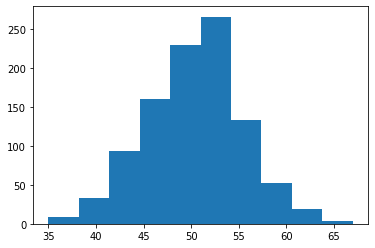

In [2]:
# Making an empty list called count into which the number of times heads wins out of 100 is added(finishes with 1000 numbers)
count = []
# the code is run 1000 times
for i in range(1000):
    x = rng.binomial(1, 0.5, 100)  #rng.binomial used to output 0 or 1 100 times. 0.5 is the probability of either number appearing
    y = np.count_nonzero(x ==1)  #np.count_nonzero is used to count number of appearance of non-zero integers in a numpy array
                                  # using x==1 gets it to count the number of 1s that appear which i have assigned to represent heads
    count.append(y)      # this adds the number representing the amount of times heads appears in 100 flips      
#print(count)
plt.hist(count)      #creates a histogram of the 1000 integers which each represent the number of times heads appears in 100 coin flips
plt.show()

In [5]:
count = np.array(count)
np.array(count)

array([44, 58, 49, 46, 51, 61, 52, 50, 47, 50, 50, 47, 49, 44, 50, 48, 51,
       50, 47, 64, 47, 43, 50, 62, 55, 61, 50, 50, 49, 63, 43, 44, 53, 49,
       54, 48, 44, 53, 49, 50, 51, 52, 50, 52, 54, 44, 48, 52, 52, 48, 49,
       50, 48, 44, 51, 39, 62, 45, 52, 50, 49, 37, 40, 55, 47, 46, 60, 50,
       48, 51, 39, 50, 56, 54, 48, 43, 51, 53, 52, 52, 49, 49, 56, 45, 59,
       46, 48, 50, 61, 52, 54, 56, 55, 50, 53, 39, 45, 49, 45, 52, 45, 56,
       56, 56, 56, 42, 55, 51, 38, 47, 55, 47, 55, 52, 44, 47, 55, 56, 53,
       50, 50, 55, 56, 54, 46, 47, 51, 53, 50, 43, 43, 50, 49, 55, 52, 50,
       45, 48, 53, 45, 40, 54, 50, 60, 53, 45, 55, 44, 57, 60, 41, 46, 56,
       44, 55, 48, 55, 49, 44, 50, 49, 45, 48, 49, 49, 47, 44, 48, 54, 52,
       58, 60, 48, 47, 44, 42, 52, 50, 48, 51, 48, 42, 48, 49, 47, 48, 51,
       56, 55, 52, 51, 48, 53, 44, 56, 46, 45, 54, 54, 49, 46, 47, 50, 64,
       48, 48, 52, 51, 54, 53, 51, 43, 52, 44, 52, 53, 55, 38, 47, 55, 50,
       51, 58, 56, 53, 47

### Task 4: Simpson's Paradox
<br>
The Simpson's Paradox is an occurence in statistics in which a trend that appears in several groups is reversed or disappears when the groups are combined [4]. To prevent this phenomenon from occuring the researcher must determine how best to interpret the results and whether the data should be segregated into groups or combined and looked at as a whole. The methos chosen depends on how the data was generated and what factors are influencing the results [5]. 

In [427]:
x1= np.linspace(4, 10, 20)

In [507]:
a1= 6
b1= 12
y1= a1 * x1 + b1

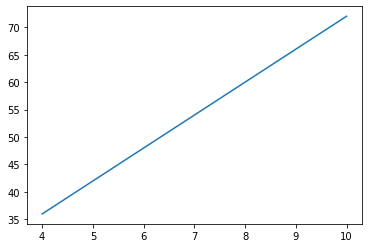

In [508]:
plt.plot(x1, y1)
plt.show()

In [520]:
x2= np.linspace(8, 12, 20)
a2= 4
b2= 2
y2= a2 * x2 + b2

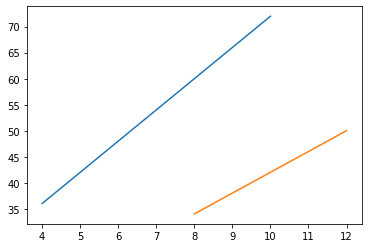

In [521]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

In [522]:
x3= np.linspace(4, 10, 20)
a3= 9
b3= 5
y3= a3 * x3 + b3

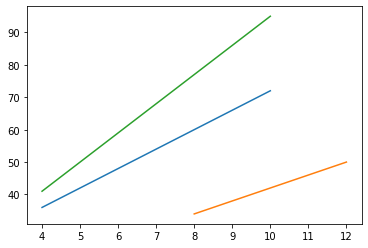

In [523]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.show()

In [524]:
x4= np.linspace(2, 6, 20)
a4= 16
b4= 13
y4= a4 * x4 + b4

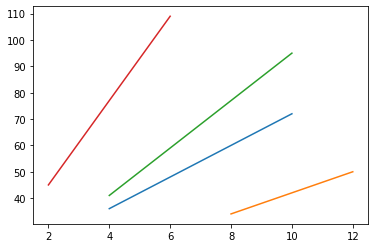

In [525]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.show()

In [526]:
x = np.concatenate([x1, x2, x3, x4])

In [527]:
y = np.concatenate([y1, y2, y3, y4])

In [528]:
coeffs = np.polyfit(x, y, 1)
coeffs

array([-0.9351145 , 66.79580153])

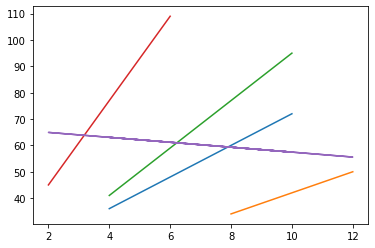

In [529]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x, coeffs[0] * x + coeffs[1])
plt.show()

[1]. Counting the frequencies in a list using dictionary in Python; https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

[2]. The Python Tutorial, 5.5 Dictionaries; https://docs.python.org/3.9/tutorial/datastructures.html#dictionaries

[3]. Random Generator, NumPy v1.19 Manual; https://numpy.org/doc/stable/reference/random/generator.html

[4]. Simpson's Paradox; https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.

[5]. Simpson's Paradox: How to Prove Opposite Arguments with the Same Data; https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9